In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

In [ ]:
def ga(generations, num_individuals, instances):
    '''
    Function that computes the Genetic Algorithm (GA) for the Travelling salesman problem.
    Input: number of generations, number of individuals, and instance file with distances between cities.
    Output: a vector with the average fitness at each iteration (generation) and a vector with the best fitness at each iteration (generation).
    '''
    average=[]
    best=[]
    cities=len(instances)
    a=np.linspace(0,cities-1,cities)
    individuals=[]
    for j in range(num_individuals):
        individuals.append(np.random.permutation(a))
   
    for g in range(generations):
        parents=np.random.choice(num_individuals, 2, replace=False)
        father=individuals[parents[0]]
        mother=individuals[parents[1]]
        cut1=np.random.choice(a)
        b=a[int(cut1):]
        cut2=np.random.choice(b)
        crossover1=father[int(cut1):int(cut2)]
        crossover2=mother[int(cut1):int(cut2)]
        child1=father
        s=0
        for c in range(cities):
            if s==cut1:
                s=int(cut2)
            if s==cities:
                break
            if mother[c] not in crossover1:
                child1[s]=mother[c]
                s+=1
                    
        child2=mother
        s=0
        for c in range(cities):
            if s==cut1:
                s=int(cut2)
            if s==cities:
                break
            if father[c] not in crossover2:
                child2[s]=father[c]
                s+=1
            
        mutation1=int(np.random.choice(a))
        b=np.delete(a,mutation1)
        mutation2=int(np.random.choice(b))
        mutation=child1[mutation1]
        child1[mutation1]=child1[mutation2]
        child1[mutation1]=mutation
        mutation=child2[mutation1]
        child2[mutation1]=child2[mutation2]
        child2[mutation1]=mutation
            
        individuals.append(child1)
        individuals.append(child2)
        
        fitness=[]
        for indi in individuals:
            dist=0
            for index in range(cities-1):
                city1=int(indi[index])
                city2=int(indi[index+1])
                dist+=distance.euclidean(instances[city1],instances[city2])
            fitness.append(1/dist)
        
        average.append(np.mean(fitness))
        best.append(max(fitness))
        
        sort=np.sort(fitness)
        threshold=sort[2]
        next_individuals=[]
        for q in range(len(individuals)):
            if fitness[q]>=threshold:
                next_individuals.append(individuals[q])
        individuals=next_individuals
        
    return average, best

In [64]:
def local_search(cities, instances, child1, f1):
    '''
    Function that computes the 2-opt local search for the Travelling salesman problem.
    Input: number of cities, instance file with distances between cities, individual that we want to improve, and individual's fitness
    Output: improved individual (or the same individual if it cannot be further improved by local search) and its (new) fitness
    '''
    for i in range(cities):
        new_child1=child1
        j=i+2  #[1:1] and [1:2] would not change anything because they take the same number
        while j<cities:
            new_child1[i:j]=np.flip(new_child1[i:j])
            dist1=0
            for index in range(cities-1):
                city1=int(new_child1[index])
                city2=int(new_child1[index+1])
                dist1+=distance.euclidean(instances[city1],instances[city2])
            fn1=1/dist1
            if fn1 > f1:
                child1=new_child1
                f1=fn1
                break
            j+=1
    return child1, f1

In [ ]:
def memetic(generations, num_individuals, instances):
    '''
    Function that computes the Memetic Algorithm (MA) for the Travelling salesman problem.
    Input: number of generations, number of individuals, and instance file with distances between cities.
    Output: a vector with the average fitness at each iteration (generation) and a vector with the best fitness at each iteration (generation).
    '''
    average=[]
    best=[]
    cities=len(instances)
    a=np.linspace(0,cities-1,cities)
    individuals=[]
    for j in range(num_individuals):
        individuals.append(np.random.permutation(a))
   
    for g in range(generations):
        fitness=[]
        for indi in individuals:
            dist=0
            for index in range(cities-1):
                city1=int(indi[index])
                city2=int(indi[index+1])
                dist+=distance.euclidean(instances[city1],instances[city2])
            fitness.append(1/dist)
        
        parents=np.random.choice(num_individuals, 2, replace=False)
        father=individuals[parents[0]]
        mother=individuals[parents[1]]
        cut1=np.random.choice(a)
        b=a[int(cut1):]
        cut2=np.random.choice(b)
        crossover1=father[int(cut1):int(cut2)]
        crossover2=mother[int(cut1):int(cut2)]
        child1=father
        s=0
        for c in range(cities):
            if s==cut1:
                s=int(cut2)
            if s==cities:
                break
            if mother[c] not in crossover1:
                child1[s]=mother[c]
                s+=1

        child2=mother
        s=0
        for c in range(cities):
            if s==cut1:
                s=int(cut2)
            if s==cities:
                break
            if father[c] not in crossover2:
                child2[s]=father[c]
                s+=1
            
        mutation1=int(np.random.choice(a))
        b=np.delete(a,mutation1)
        mutation2=int(np.random.choice(b))
        mutation=child1[mutation1]
        child1[mutation1]=child1[mutation2]
        child1[mutation1]=mutation
        mutation=child2[mutation1]
        child2[mutation1]=child2[mutation2]
        child2[mutation1]=mutation
            
        dist1=0
        dist2=0
        for index in range(cities-1):
            city1=int(child1[index])
            city2=int(child1[index+1])
            dist1+=distance.euclidean(instances[city1],instances[city2])
            dist2+=distance.euclidean(instances[int(child2[index])],instances[int(child2[index+1])])
        f1=1/dist1
        f2=1/dist2
                   
        child1, f1=local_search(cities, instances, child1, f1)
        child2, f2=local_search(cities, instances, child2, f2)
            
        individuals.append(child1)
        individuals.append(child2)
        fitness.append(f1)
        fitness.append(f2)
        average.append(np.mean(fitness))
        best.append(max(fitness))
            
        sort=np.sort(fitness)
        threshold=sort[2]
        next_individuals=[]
        for q in range(len(individuals)):
            if fitness[q]>=threshold:
                next_individuals.append(individuals[q])
        individuals=next_individuals
        
    return average, best

In [86]:
#Create vectors containing the results of applying 10 times the GA and the MA in the two different instance files (both in the Github repository).

ga1a=[0]*250
ga1m=[0]*250
ga2a=[0]*250
ga2m=[0]*250
me1a=[0]*250
me1m=[0]*250
me2a=[0]*250
me2m=[0]*250
generations=np.linspace(0,250,250)

for i in range(10):
    ga1a[i], ga1m[i]=ga(250,10,np.loadtxt('file-tsp.txt'))
    me1a[i], me1m[i]=memetic(250,10,np.loadtxt('file-tsp.txt'))
    ga2a[i], ga2m[i]=ga(250,10,np.loadtxt('tsp2.txt'))
    me2a[i], me2m[i]=memetic(250,10,np.loadtxt('tsp2.txt'))

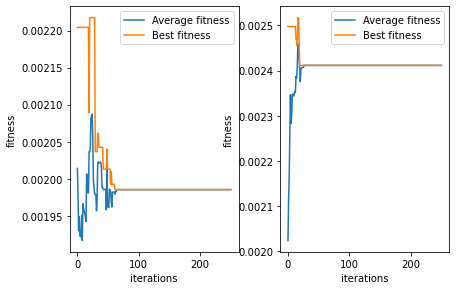

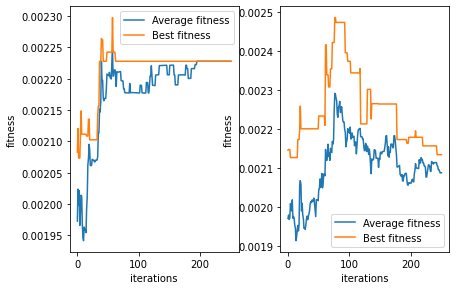

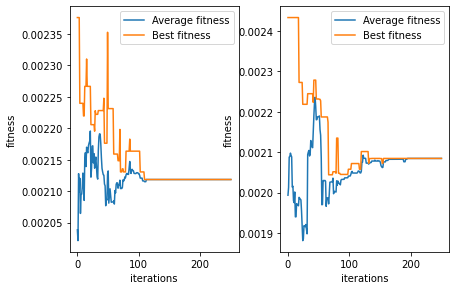

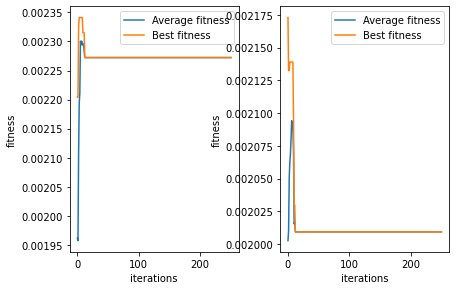

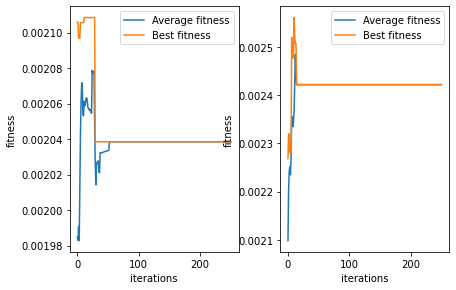

In [97]:
#Plot the GA results for the instance 'file-tsp.txt'.

i=0
while i<10:
    fig, ax = plt.subplots(1, 2)
    fig.tight_layout()
    ax[0].plot(generations,ga1a[i])
    ax[0].plot(generations,ga1m[i])
    ax[0].set_xlabel('iterations')
    ax[0].legend(['Average fitness', 'Best fitness'], loc='best')
    ax[0].set_ylabel('fitness')

    ax[1].plot(generations,ga1a[i+1])
    ax[1].plot(generations,ga1m[i+1])
    ax[1].legend(['Average fitness', 'Best fitness'], loc='best')
    ax[1].set_xlabel('iterations')
    ax[1].set_ylabel('fitness')
    i+=2

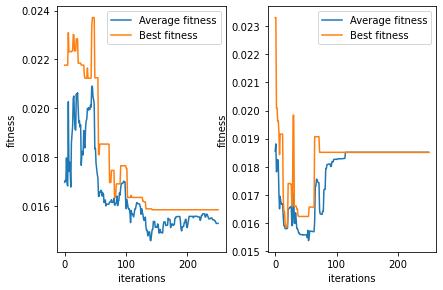

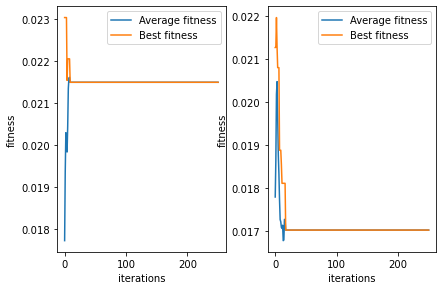

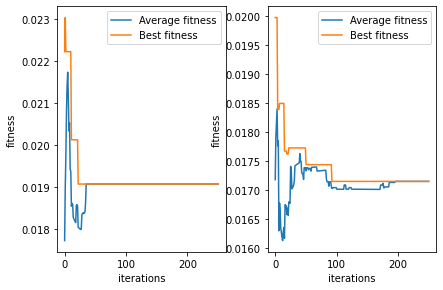

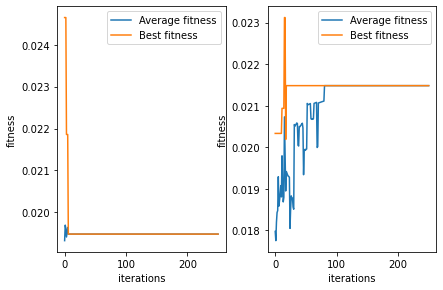

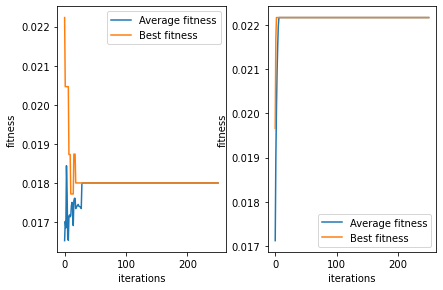

In [98]:
#Plot the GA results for the instance 'tsp2.txt'.

i=0
while i<10:
    fig, ax = plt.subplots(1, 2)
    fig.tight_layout()
    ax[0].plot(generations,ga2a[i])
    ax[0].plot(generations,ga2m[i])
    ax[0].set_xlabel('iterations')
    ax[0].legend(['Average fitness', 'Best fitness'], loc='best')
    ax[0].set_ylabel('fitness')

    ax[1].plot(generations,ga2a[i+1])
    ax[1].plot(generations,ga2m[i+1])
    ax[1].legend(['Average fitness', 'Best fitness'], loc='best')
    ax[1].set_xlabel('iterations')
    ax[1].set_ylabel('fitness')
    i+=2

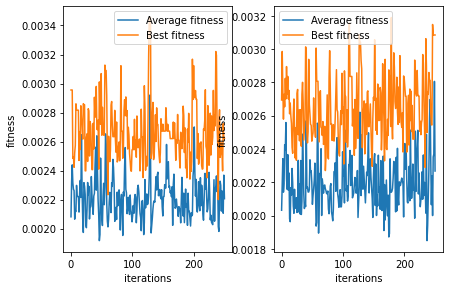

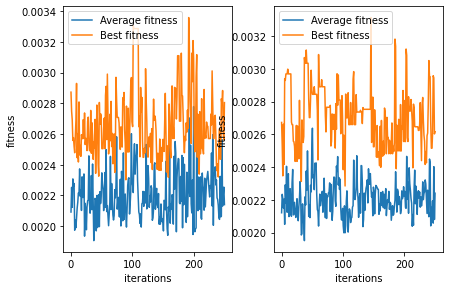

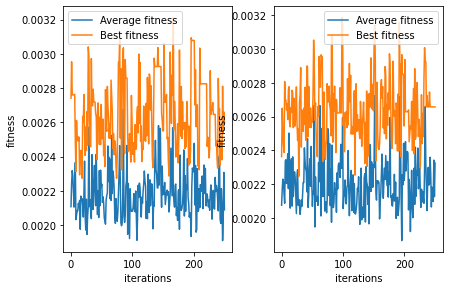

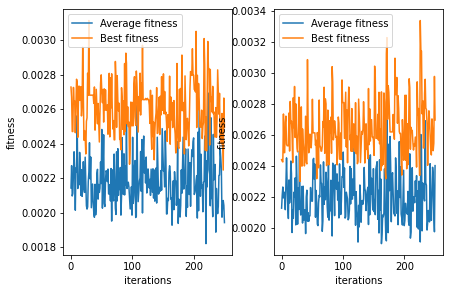

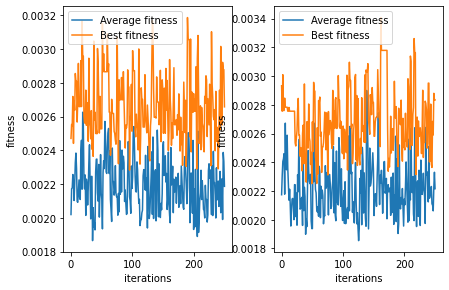

In [99]:
#Plot the MA results for the instance 'file-tsp.txt'.

i=0
while i<10:
    fig, ax = plt.subplots(1, 2)
    fig.tight_layout()
    ax[0].plot(generations,me1a[i])
    ax[0].plot(generations,me1m[i])
    ax[0].set_xlabel('iterations')
    ax[0].legend(['Average fitness', 'Best fitness'], loc='best')
    ax[0].set_ylabel('fitness')

    ax[1].plot(generations,me1a[i+1])
    ax[1].plot(generations,me1m[i+1])
    ax[1].legend(['Average fitness', 'Best fitness'], loc='best')
    ax[1].set_xlabel('iterations')
    ax[1].set_ylabel('fitness')
    i+=2

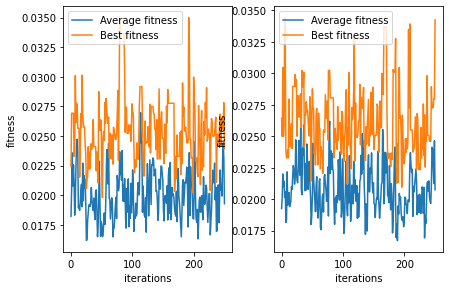

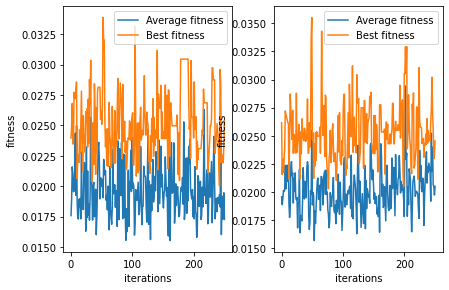

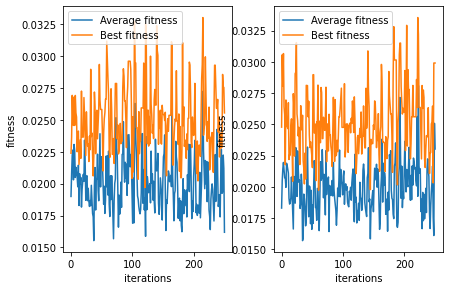

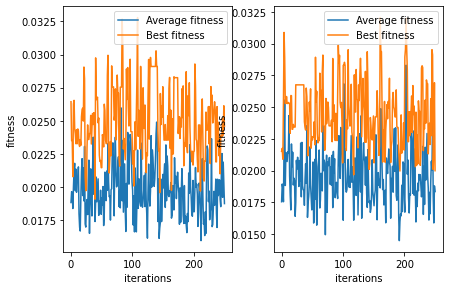

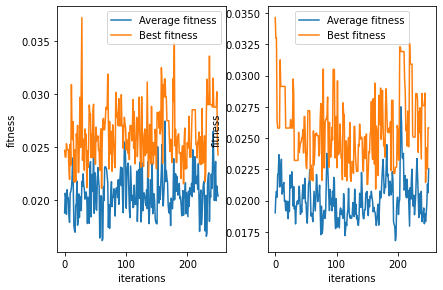

In [101]:
#Plot the MA results for the instance 'tsp2.txt'.

i=0
while i<10:
    fig, ax = plt.subplots(1, 2)
    fig.tight_layout()
    ax[0].plot(generations,me2a[i])
    ax[0].plot(generations,me2m[i])
    ax[0].set_xlabel('iterations')
    ax[0].legend(['Average fitness', 'Best fitness'], loc='best')
    ax[0].set_ylabel('fitness')

    ax[1].plot(generations,me2a[i+1])
    ax[1].plot(generations,me2m[i+1])
    ax[1].legend(['Average fitness', 'Best fitness'], loc='best')
    ax[1].set_xlabel('iterations')
    ax[1].set_ylabel('fitness')
    i+=2